In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/kaggle/input/breast-cancer/breast-cancer.csv')

In [3]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
print(data.shape)

(569, 32)


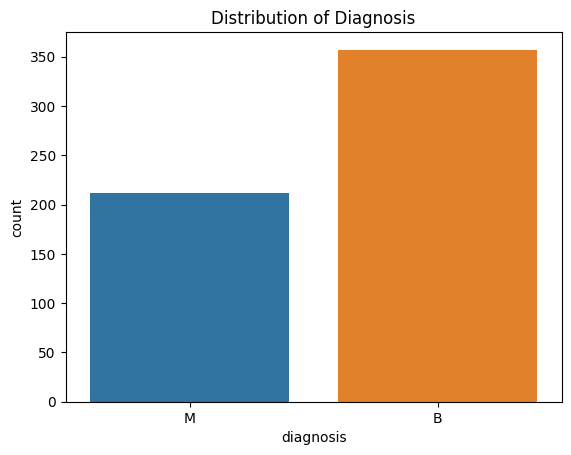

In [8]:
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

In [9]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

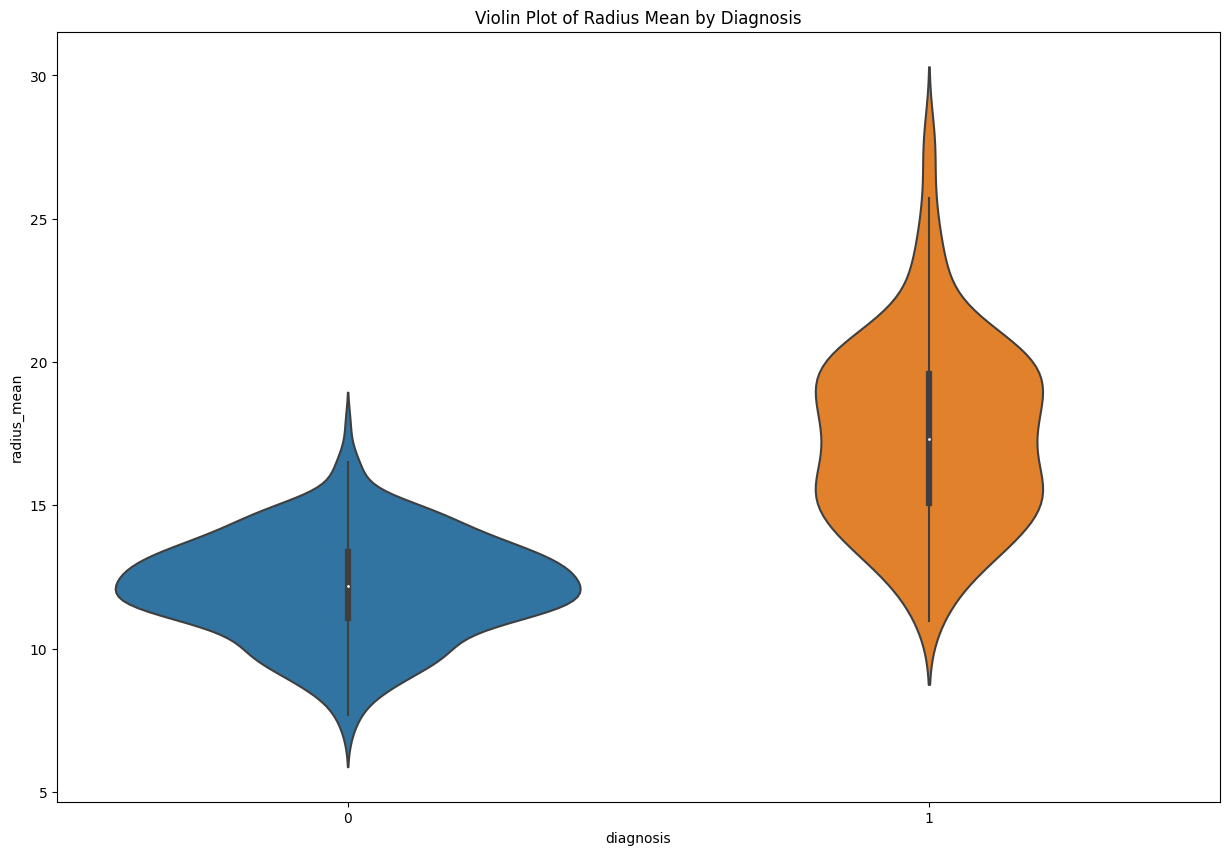

In [10]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='diagnosis', y='radius_mean', data=data)
plt.title('Violin Plot of Radius Mean by Diagnosis')
plt.show()

In [11]:
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2,random_state=42)

In [13]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_predtest = log_reg.predict(X_test)
y_predtrain = log_reg.predict(X_train)

In [16]:
print("Accuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train, y_predtrain)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predtest)}")

Accuracy Score:
Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158


In [17]:
print("Precision Score:")
print(f"Train Precision: {precision_score(y_train, y_predtrain)}")
print(f"Test Precision: {precision_score(y_test, y_predtest)}")

Precision Score:
Train Precision: 0.9880239520958084
Test Precision: 0.9761904761904762


In [18]:
print("Recall Score:")
print(f"Train Recall: {recall_score(y_train, y_predtrain)}")
print(f"Test Recall: {recall_score(y_test, y_predtest)}")

Recall Score:
Train Recall: 0.9763313609467456
Test Recall: 0.9534883720930233


In [19]:
print("Classification Report (Test):")
print(classification_report(y_test, y_predtest))

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [20]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predtest))

Confusion Matrix (Test):
[[70  1]
 [ 2 41]]
